In [5]:
import pandas as pd
import warnings
import numpy as np
# warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix
import scikitplot as skplt
import plotly.express as px

### Read Data

In [6]:
data = pd.read_csv('health_data.csv')

In [36]:
data.head

<bound method NDFrame.head of         Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  \
0       4.0  1.0       0.0        1.0  26.0     0.0                   0.0   
1      12.0  1.0       1.0        1.0  26.0     1.0                   0.0   
2      13.0  1.0       0.0        1.0  26.0     0.0                   0.0   
3      11.0  1.0       1.0        1.0  28.0     1.0                   0.0   
4       8.0  0.0       0.0        1.0  29.0     1.0                   0.0   
...     ...  ...       ...        ...   ...     ...                   ...   
70687   6.0  0.0       1.0        1.0  37.0     0.0                   0.0   
70688  10.0  1.0       1.0        1.0  29.0     1.0                   1.0   
70689  13.0  0.0       1.0        1.0  25.0     0.0                   1.0   
70690  11.0  0.0       1.0        1.0  18.0     0.0                   0.0   
70691   9.0  0.0       1.0        1.0  25.0     0.0                   1.0   

       PhysActivity  Fruits  Veggies  HvyAlco

In [37]:
data.shape

(70692, 18)

#### Data vars visualization:

In [38]:
data.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Diabetes', 'Hypertension', 'Stroke'],
      dtype='object')

In [7]:
data.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.500000,0.563458,0.062171
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.500004,0.495960,0.241468
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.500000,1.000000,0.000000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,1.000000,0.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
corr

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
Age,1.000000,-0.002315,0.240338,0.101743,-0.038648,0.105424,0.221878,-0.100753,0.061096,-0.018893,-0.057705,0.155624,-0.101746,0.084852,0.195265,0.278738,0.338132,0.123879
Sex,-0.002315,1.000000,0.017324,-0.007991,0.000827,0.112125,0.098161,0.051753,-0.088723,-0.052604,0.014164,-0.014555,-0.089204,-0.045957,-0.082248,0.044413,0.040819,0.003822
HighChol,0.240338,0.017324,1.000000,0.085981,0.131309,0.093398,0.181187,-0.090453,-0.047384,-0.042836,-0.025443,0.237778,0.083881,0.142610,0.162043,0.289213,0.316515,0.099786
CholCheck,0.101743,-0.007991,0.085981,1.000000,0.045648,-0.004331,0.043497,-0.008249,0.017384,0.000349,-0.027146,0.059213,-0.010660,0.034540,0.044430,0.115382,0.103283,0.022529
BMI,-0.038648,0.000827,0.131309,0.045648,1.000000,0.011551,0.060355,-0.170936,-0.084505,-0.056528,-0.058232,0.267888,0.104682,0.161862,0.246094,0.293373,0.241019,0.022931
Smoker,0.105424,0.112125,0.093398,-0.004331,0.011551,1.000000,0.124418,-0.079823,-0.074811,-0.029926,0.077835,0.152416,0.091257,0.120698,0.119789,0.085999,0.087438,0.064658
HeartDiseaseorAttack,0.221878,0.098161,0.181187,0.043497,0.060355,0.124418,1.000000,-0.098223,-0.019436,-0.036315,-0.037130,0.275868,0.075057,0.198416,0.232611,0.211523,0.210750,0.223394
PhysActivity,-0.100753,0.051753,-0.090453,-0.008249,-0.170936,-0.079823,-0.098223,1.000000,0.133813,0.149322,0.019111,-0.273548,-0.130090,-0.234500,-0.276868,-0.158666,-0.136102,-0.079985
Fruits,0.061096,-0.088723,-0.047384,0.017384,-0.084505,-0.074811,-0.019436,0.133813,1.000000,0.238605,-0.033246,-0.098687,-0.062102,-0.048572,-0.050784,-0.054077,-0.040852,-0.008996
Veggies,-0.018893,-0.052604,-0.042836,0.000349,-0.056528,-0.029926,-0.036315,0.149322,0.238605,1.000000,0.022090,-0.115795,-0.052359,-0.066896,-0.084072,-0.079293,-0.066624,-0.047601


<AxesSubplot:>

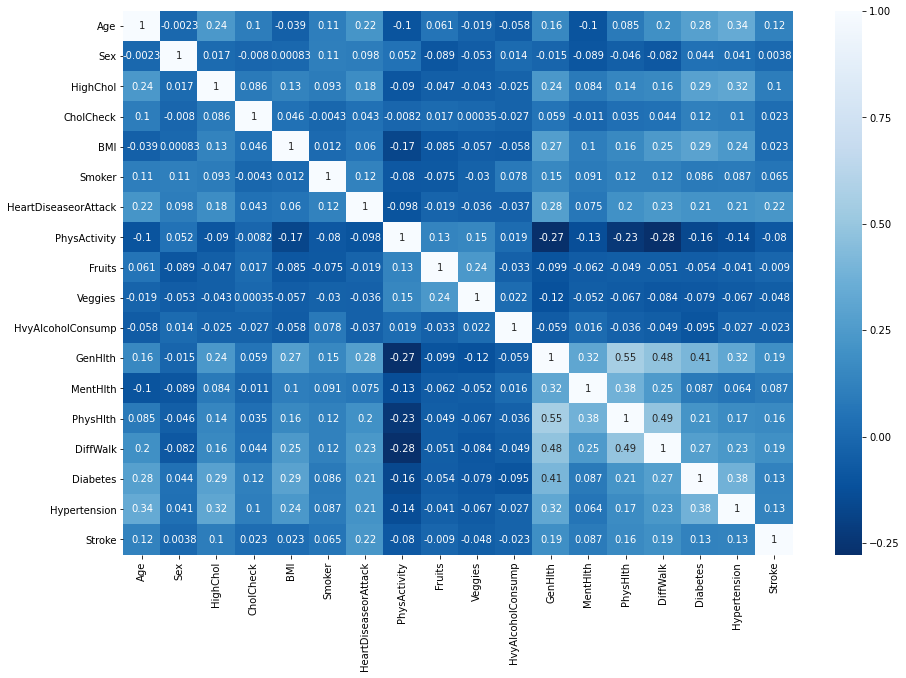

In [18]:
plt.figure(figsize=(15,10))
corr = data[data.columns].corr()
sns.heatmap(corr, annot=True,cmap='Blues_r',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [40]:
data.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Diabetes', 'Hypertension', 'Stroke'],
      dtype='object')

In [8]:
bin_var = ['Sex', 'HighChol', 'CholCheck',  'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'DiffWalk',
       'Diabetes', 'Hypertension', 'Stroke']
cont_var = ['Age','BMI','GenHlth', 'MentHlth', 'PhysHlth']

In [9]:
data[cont_var].describe()

,Age,BMI,GenHlth,MentHlth,PhysHlth
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,29.856985,2.837082,3.752037,5.810417
std,2.852153,7.113954,1.113565,8.155627,10.062261
min,1.000000,12.000000,1.000000,0.000000,0.000000
25%,7.000000,25.000000,2.000000,0.000000,0.000000
50%,9.000000,29.000000,3.000000,0.000000,0.000000
75%,11.000000,33.000000,4.000000,2.000000,6.000000
max,13.000000,98.000000,5.000000,30.000000,30.000000


In [41]:
data.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Diabetes', 'Hypertension', 'Stroke'],
      dtype='object')

In [42]:
im_var = ['CholCheck', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'DiffWalk']

In [43]:
data[im_var].describe()

,CholCheck,HeartDiseaseorAttack,PhysActivity,Veggies,HvyAlcoholConsump,DiffWalk
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.975259,0.147810,0.703036,0.788774,0.042721,0.252730
std,0.155336,0.354914,0.456924,0.408181,0.202228,0.434581
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
data['Diabetes'].describe()

count    70692.000000
mean         0.500000
std          0.500004
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: Diabetes, dtype: float64

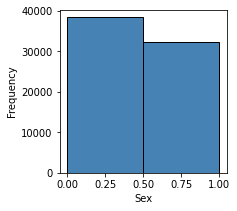

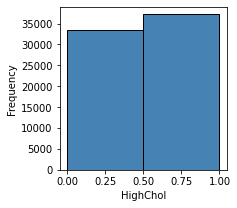

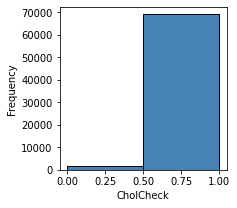

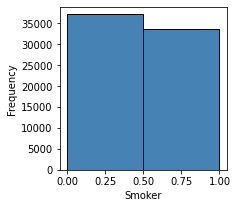

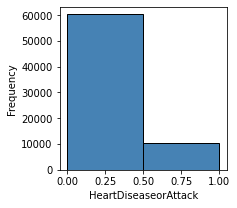

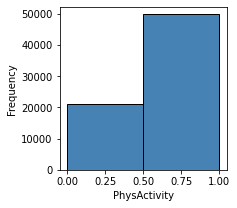

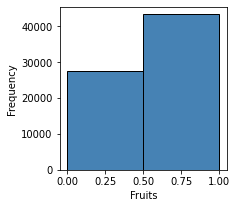

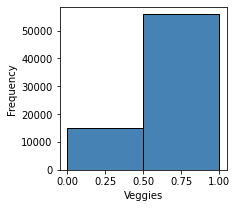

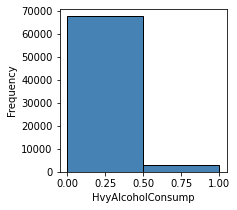

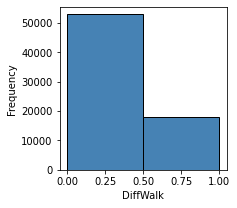

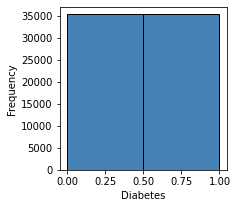

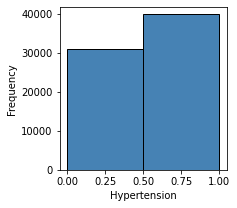

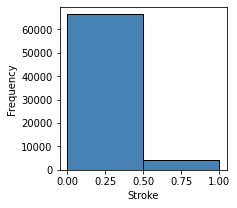

In [16]:
for i in bin_var:
    plt.xlabel(i)
    data[i].plot(kind='hist', bins=2, figsize=(3,3), facecolor='steelblue',edgecolor='black')
    plt.show()

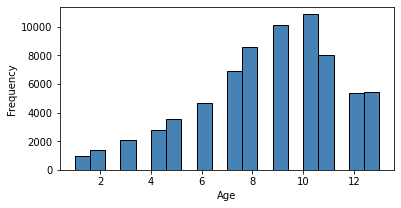

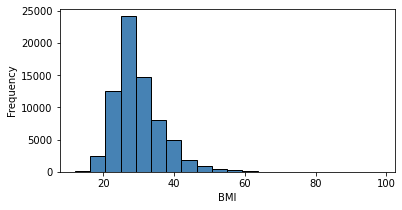

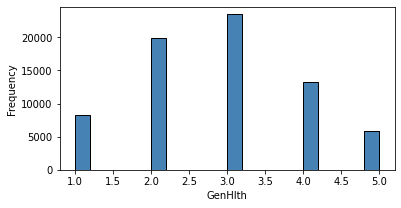

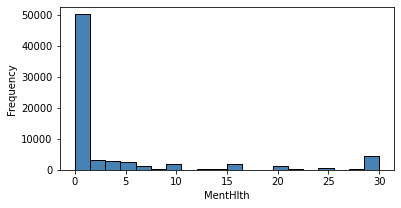

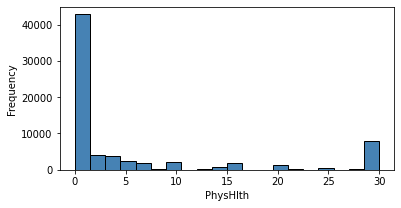

In [17]:
for i in cont_var:
    plt.xlabel(i)
    data[i].plot(kind='hist', bins=20, figsize=(6,3), facecolor='steelblue',edgecolor='black')
    plt.show()

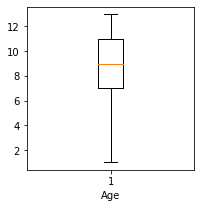

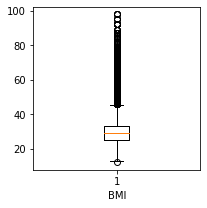

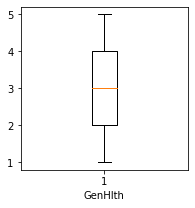

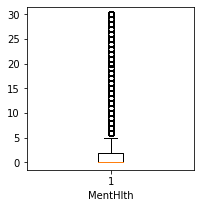

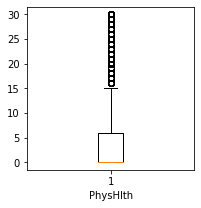

In [27]:
## boxplot
for i in cont_var:
    fig = plt.figure(figsize =(3,3))
    plt.xlabel(i)
    plt.boxplot(data[i])
    plt.show()


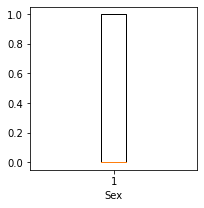

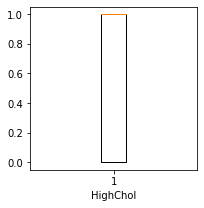

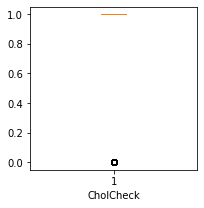

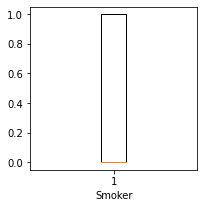

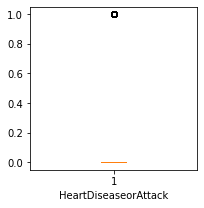

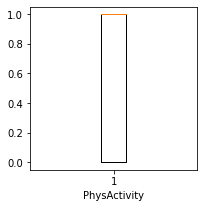

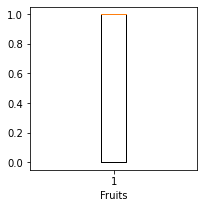

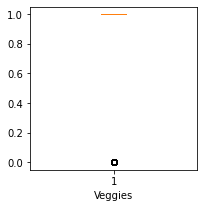

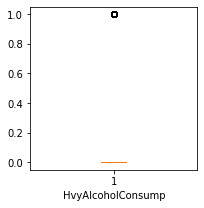

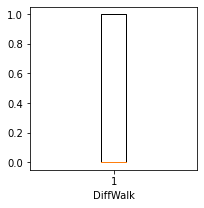

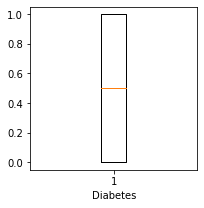

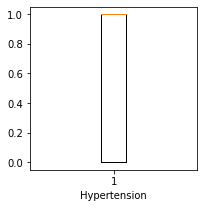

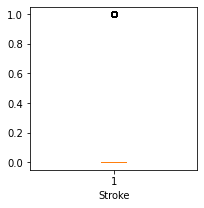

In [36]:
for i in bin_var:
    fig = plt.figure(figsize =(3,3))
    plt.xlabel(i)
    plt.boxplot(data[i])
    plt.show()

In [24]:
data.loc[data['BMI']>60]

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
199,8.0,0.0,0.0,1.0,69.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,10.0,30.0,1.0,0.0,0.0,0.0
553,2.0,0.0,0.0,1.0,92.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,30.0,0.0,0.0,0.0,0.0,0.0
612,10.0,0.0,1.0,1.0,98.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,20.0,0.0,0.0,0.0,0.0
783,11.0,1.0,0.0,1.0,79.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0
1070,11.0,1.0,1.0,1.0,79.0,1.0,0.0,1.0,1.0,1.0,1.0,4.0,4.0,3.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68214,10.0,0.0,1.0,1.0,67.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,5.0,2.0,1.0,1.0,1.0,0.0
68371,6.0,1.0,1.0,1.0,68.0,1.0,1.0,0.0,0.0,1.0,0.0,5.0,15.0,30.0,1.0,1.0,1.0,0.0
68544,9.0,0.0,0.0,1.0,61.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,15.0,30.0,1.0,1.0,1.0,0.0
69233,7.0,0.0,1.0,1.0,65.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,0.0,30.0,1.0,1.0,1.0,0.0


#### Train Test Split


In [29]:
y_cols = ['Diabetes']
X = data.drop(y_cols,axis=1)
y = data[y_cols]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10,stratify=y)

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
X_train.shape

(49484, 17)

In [32]:
X_train_scaled.shape

(49484, 17)

#### Outlier Detection

In [33]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train_scaled)

### logistic reg


In [34]:
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train_scaled, y_train.values.ravel())
y_pred = logreg.predict(X_test_scaled)

In [35]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[7628, 2976],
       [2512, 8092]], dtype=int64)

In [46]:
cnf_matrix

array([[7628, 2976],
       [2512, 8092]], dtype=int64)

In [48]:
sum(cnf_matrix).sum()

21208

In [49]:
cnf_matrix_1 = cnf_matrix/(sum(cnf_matrix).sum())

Text(0.5, 257.44, 'Predicted label')

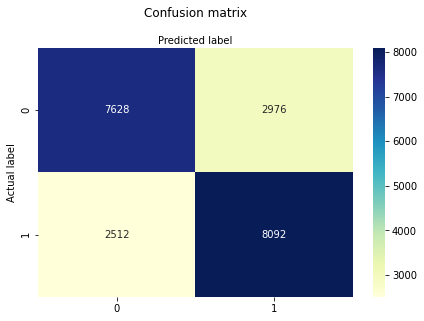

In [52]:
class_names=[1,0] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Text(0.5,257.44,'Predicted label');

In [55]:
tpr = 8092/(8092+2512)
tpr

0.7631082610335722

In [45]:
# np.array(corr)

In [52]:
from sklearn.metrics import classification_report
target_names = ['no diabetes', 'diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 no diabetes       0.75      0.72      0.74     10604
    diabetes       0.73      0.76      0.75     10604

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208



In [53]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7412297246322143


In [77]:
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.f1_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred))

0.7357944263481723

In [56]:
metrics.precision_score(y_test,y_pred)

0.7311167329237441

c:\Users\qiuxi\Anaconda3_2\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


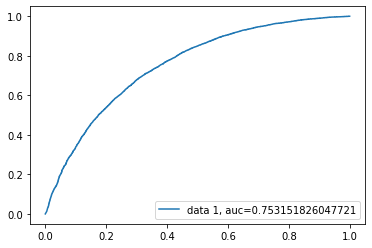

In [54]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

c:\Users\qiuxi\Anaconda3_2\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


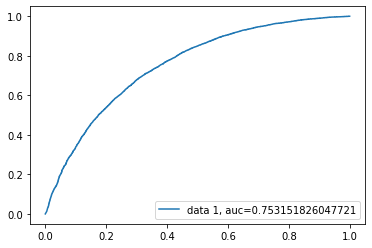

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<AxesSubplot:title={'center':'PR Curve for Logistic Regression'}, xlabel='Recall', ylabel='Precision'>

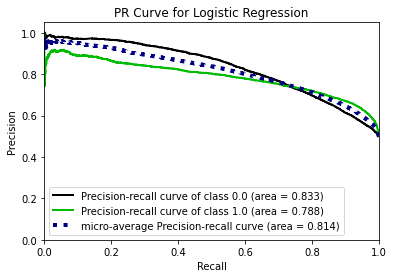

In [55]:
y_log_proba = logreg.predict_proba(X_test_scaled)
skplt.metrics.plot_precision_recall(y_test, y_log_proba, title = 'PR Curve for Logistic Regression')

### Random Forest(MRF)

In [57]:
#model
clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train_scaled,y_train)

y_pred=clf.predict(X_test_scaled)

c:\Users\qiuxi\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [58]:
cnf_matrix2 = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix2

array([[7207, 3397],
       [2499, 8105]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

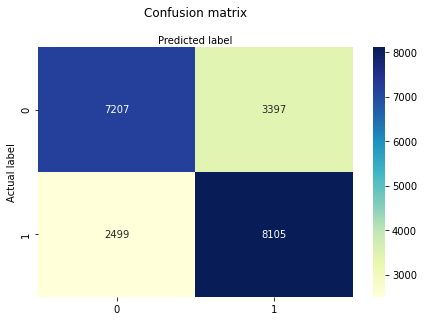

In [59]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Text(0.5,257.44,'Predicted label');

In [60]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train_scaled, y_train)

c:\Users\qiuxi\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier()

In [61]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

BMI                     0.212987
Age                     0.151984
GenHlth                 0.129842
PhysHlth                0.086879
Hypertension            0.079856
MentHlth                0.067530
HighChol                0.038612
Smoker                  0.034061
Fruits                  0.033247
Sex                     0.030730
DiffWalk                0.029698
PhysActivity            0.028141
Veggies                 0.026713
HeartDiseaseorAttack    0.019656
Stroke                  0.012043
HvyAlcoholConsump       0.011152
CholCheck               0.006869
dtype: float64

In [68]:
data.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Diabetes', 'Hypertension', 'Stroke'],
      dtype='object')

In [69]:
features =['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
        'Hypertension', 'Stroke']

In [71]:
features[0]

'Age'

Text(0.5, 0, 'Relative Importance')

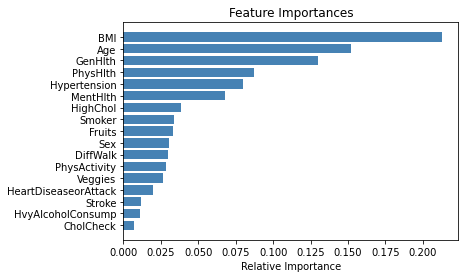

In [73]:
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='steelblue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

In [61]:
target_names = ['no diabetes', 'diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 no diabetes       0.75      0.68      0.71     10604
    diabetes       0.71      0.77      0.74     10604

    accuracy                           0.72     21208
   macro avg       0.73      0.72      0.72     21208
weighted avg       0.73      0.72      0.72     21208



In [62]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7246322142587702


In [63]:
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.f1_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))

0.7219917012448133
0.7332850809734914
0.7046600591201531
0.764334213504338


### knn classification


In [74]:
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train_scaled,y_train.values.ravel())
y_pred3 = knn1.predict(X_test_scaled)
cnf_matrix3 = metrics.confusion_matrix(y_test, y_pred3)
cnf_matrix3

array([[7121, 3483],
       [2998, 7606]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

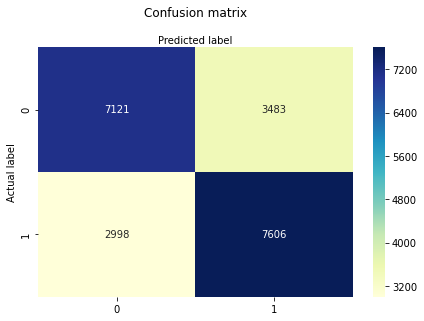

In [75]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix3), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [65]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.694407770652584


In [72]:
print(classification_report(y_test, y_pred3, target_names=target_names))

              precision    recall  f1-score   support

 no diabetes       0.70      0.67      0.69     10604
    diabetes       0.69      0.72      0.70     10604

    accuracy                           0.69     21208
   macro avg       0.69      0.69      0.69     21208
weighted avg       0.69      0.69      0.69     21208



In [66]:
#k=5
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train_scaled,y_train.values.ravel())
y_pred4 = knn2.predict(X_test_scaled)
cnf_matrix4 = metrics.confusion_matrix(y_test, y_pred4)
cnf_matrix4


array([[7202, 3402],
       [2692, 7912]], dtype=int64)

In [67]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))

Accuracy: 0.7126556016597511


In [73]:
print(classification_report(y_test, y_pred4, target_names=target_names))

              precision    recall  f1-score   support

 no diabetes       0.73      0.68      0.70     10604
    diabetes       0.70      0.75      0.72     10604

    accuracy                           0.71     21208
   macro avg       0.71      0.71      0.71     21208
weighted avg       0.71      0.71      0.71     21208



In [76]:
#k=7
knn3 = KNeighborsClassifier(n_neighbors=7)
knn3.fit(X_train_scaled,y_train.values.ravel())
y_pred5 = knn3.predict(X_test_scaled)
cnf_matrix5 = metrics.confusion_matrix(y_test, y_pred5)
cnf_matrix5

array([[7191, 3413],
       [2530, 8074]], dtype=int64)

In [77]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred5))

Accuracy: 0.7197755563938136


In [79]:
print(metrics.accuracy_score(y_test, y_pred5))
print(metrics.f1_score(y_test,y_pred5))
print(metrics.precision_score(y_test,y_pred5))
print(metrics.recall_score(y_test,y_pred5))

0.7197755563938136
0.7309764157349147
0.7028815182380082
0.7614107883817427


In [75]:
y_knn_proba = knn3.predict_proba(X_test)


c:\Users\qiuxi\Anaconda3_2\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


<AxesSubplot:title={'center':'PR Curve for knn'}, xlabel='Recall', ylabel='Precision'>

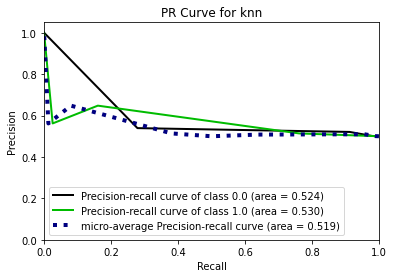

In [76]:
skplt.metrics.plot_precision_recall(y_test, y_knn_proba, title = 'PR Curve for knn')

In [133]:
y_clf_proba = clf.predict_proba(X_test)

c:\Users\qiuxi\Anaconda3_2\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


<AxesSubplot:title={'center':'PR Curve for rf'}, xlabel='Recall', ylabel='Precision'>

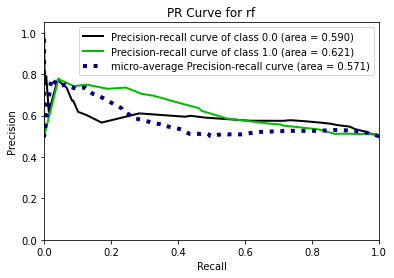

In [135]:
skplt.metrics.plot_precision_recall(y_test, y_clf_proba, title = 'PR Curve for rf')

In [175]:
data.iloc[0]['BMI']

26.0

In [176]:
for i in range(len(data)):
  if data.iloc[i]['BMI']>=85:
    print(data.iloc[i])

Age                      2.0
Sex                      0.0
HighChol                 0.0
CholCheck                1.0
BMI                     92.0
Smoker                   1.0
HeartDiseaseorAttack     0.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        0.0
GenHlth                  2.0
MentHlth                30.0
PhysHlth                 0.0
DiffWalk                 0.0
Diabetes                 0.0
Hypertension             0.0
Stroke                   0.0
Name: 553, dtype: float64
Age                     10.0
Sex                      0.0
HighChol                 1.0
CholCheck                1.0
BMI                     98.0
Smoker                   1.0
HeartDiseaseorAttack     0.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        0.0
GenHlth                  2.0
MentHlth                 0.0
PhysHlth                20.0
DiffWalk                 0.0
Diabetes         